/tmp/ipython-input-421002716.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp = yf.download("^GSPC", period="2y", progress=False)


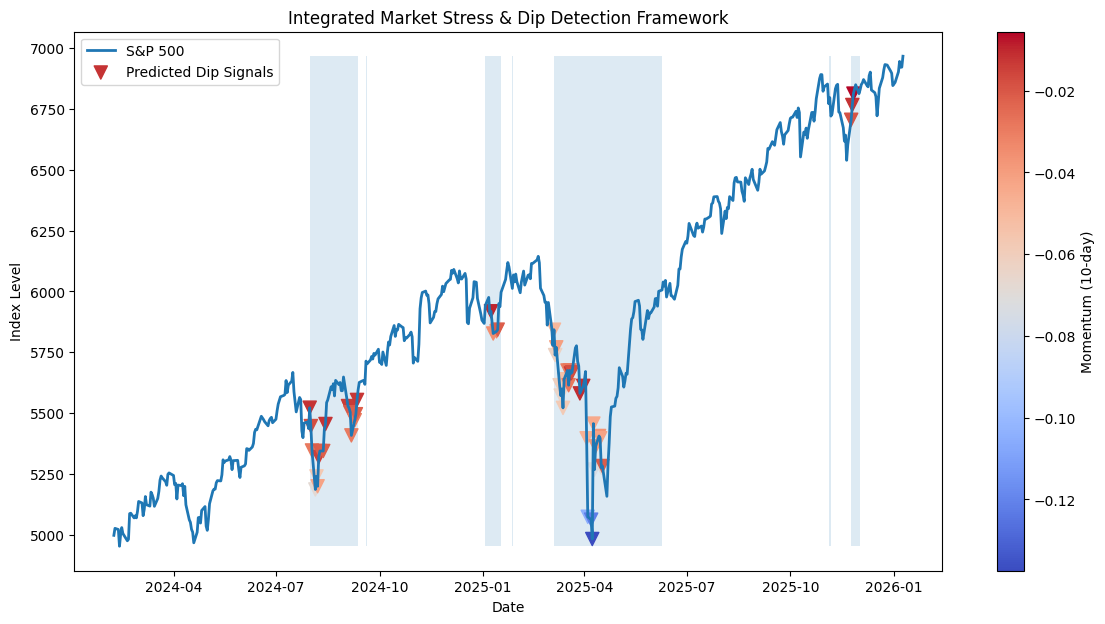

In [4]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np

sp = yf.download("^GSPC", period="2y", progress=False)

sp["return"] = sp["Close"].pct_change()
sp["vol"] = sp["return"].rolling(20).std()
sp["momentum"] = sp["Close"].pct_change(10)

vol_thresh = sp["vol"].quantile(0.75)
mom_thresh = sp["momentum"].quantile(0.25)

sp["dip_signal"] = (
    (sp["vol"] > vol_thresh) &
    (sp["momentum"] < mom_thresh)
)

sp.dropna(inplace=True)

fig, ax = plt.subplots(figsize=(14,7))

ax.plot(sp.index, sp["Close"], label="S&P 500", linewidth=2)

ax.fill_between(
    sp.index,
    sp["Close"].min(),
    sp["Close"].max(),
    where=sp["vol"] > vol_thresh,
    alpha=0.15
)

dip_points = sp[sp["dip_signal"]]

sc = ax.scatter(
    dip_points.index,
    dip_points["Close"],
    c=dip_points["momentum"],
    cmap="coolwarm",
    marker="v",
    s=90,
    label="Predicted Dip Signals"
)

plt.colorbar(sc, ax=ax, label="Momentum (10-day)")
ax.set_title("Integrated Market Stress & Dip Detection Framework")
ax.set_ylabel("Index Level")
ax.set_xlabel("Date")
ax.legend()
plt.show()